In [276]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [277]:
img1 = cv2.imread('../DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

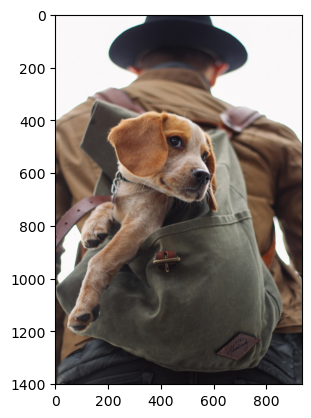

In [278]:
plt.imshow(img1)

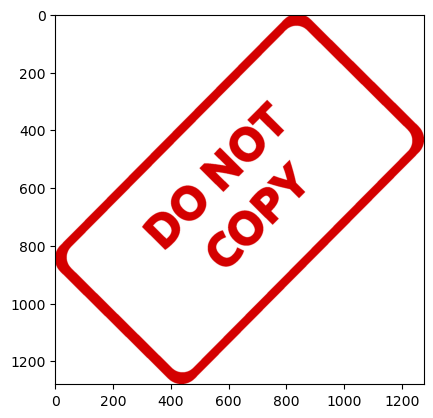

In [279]:
plt.imshow(img2)

In [280]:
img1.shape

(1401, 934, 3)

In [281]:
img2.shape

(1280, 1277, 3)

# Blending Images of the same size

In [282]:
img1 = cv2.resize(img1, (1200, 1200))
img2 = cv2.resize(img2, (1200, 1200))

In [283]:
blended = cv2.addWeighted(src1=img1, alpha=1, src2=img2, beta=0.1, gamma=10)

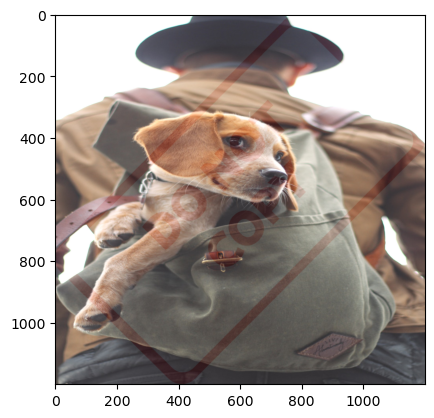

In [284]:
plt.imshow(blended)

# Overlay small image on top of a larger image (No Blending)
# Numpy reassignment

In [285]:
large_img = cv2.imread('../DATA/dog_backpack.png')
large_img = cv2.cvtColor(large_img, cv2.COLOR_BGR2RGB)
small_img = cv2.imread('../DATA/watermark_no_copy.png')
small_img = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)

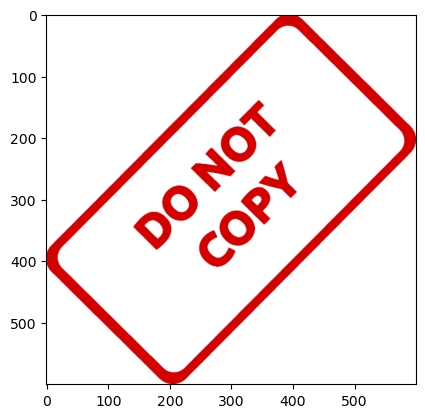

In [286]:
small_img = cv2.resize(small_img, (600, 600))
plt.imshow(small_img)

In [287]:
x_offset = 0
y_offset = 0

In [288]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [289]:
large_img[y_offset:y_end, x_offset:x_end] = small_img

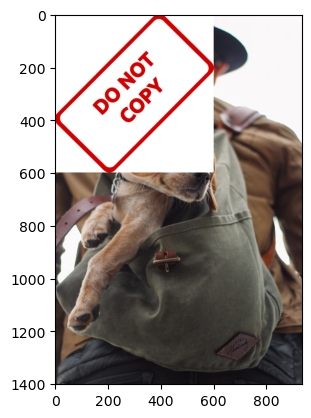

In [290]:
plt.imshow(large_img)

# Blending together images of different sizes

In [291]:
large_img = cv2.imread('../DATA/dog_backpack.png')
large_img = cv2.cvtColor(large_img, cv2.COLOR_BGR2RGB)
small_img = cv2.imread('../DATA/watermark_no_copy.png')
small_img = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)
small_img = cv2.resize(small_img, (600, 600))

In [292]:
large_img.shape

(1401, 934, 3)

In [293]:
x_offset = large_img.shape[1] - small_img.shape[1]
y_offset = large_img.shape[0] - small_img.shape[0]

In [294]:
# Tuple Unpacking
rows, cols, channels = small_img.shape

### Create ROI

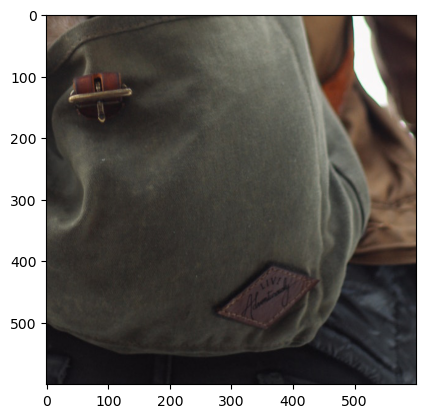

In [295]:
roi = large_img[y_offset:large_img.shape[0], x_offset:large_img.shape[1]]
plt.imshow(roi)

### Create a mask of logo and create its inverse mask

In [296]:
im2gray = cv2.cvtColor(small_img, cv2.COLOR_RGB2GRAY)

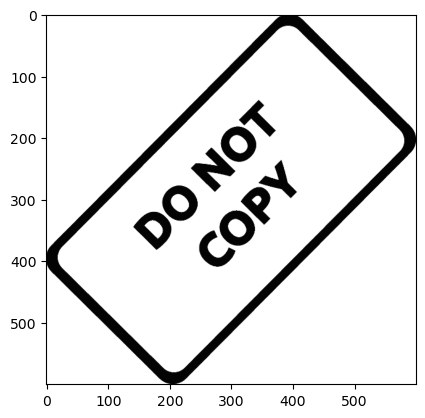

In [297]:
plt.imshow(im2gray, cmap='gray')

In [298]:
mask_inv = cv2.bitwise_not(im2gray)

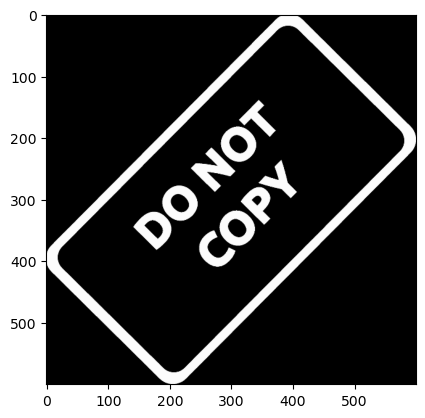

In [299]:
plt.imshow(mask_inv, cmap='gray')

In [300]:
mask_inv.shape

(600, 600)

In [301]:
import numpy as np

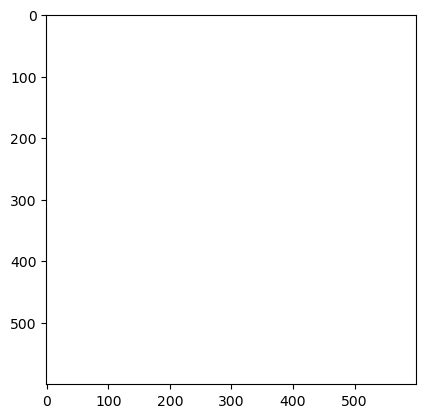

In [302]:
white_background = np.full(small_img.shape, 255, dtype=np.uint8)
plt.imshow(white_background)

In [303]:
white_background.shape

(600, 600, 3)

In [304]:
bg = cv2.bitwise_and(white_background, white_background, mask=mask_inv)

In [305]:
bg.shape

(600, 600, 3)

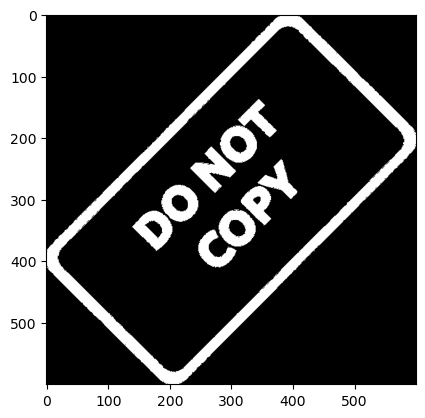

In [306]:
plt.imshow(bg)

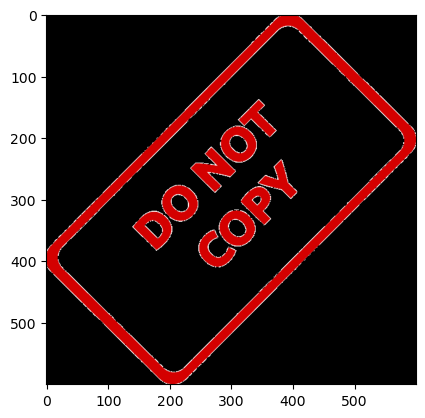

In [307]:
fg = cv2.bitwise_and(small_img, small_img, mask=mask_inv)
plt.imshow(fg)

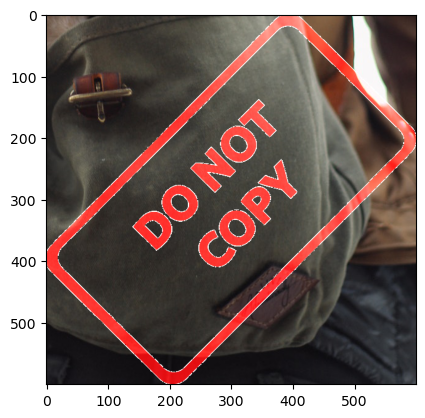

In [308]:
final_roi = cv2.add(roi, fg)
plt.imshow(final_roi)

In [309]:
large_img[y_offset:y_offset+fg.shape[0], x_offset:x_offset+fg.shape[1]] = final_roi

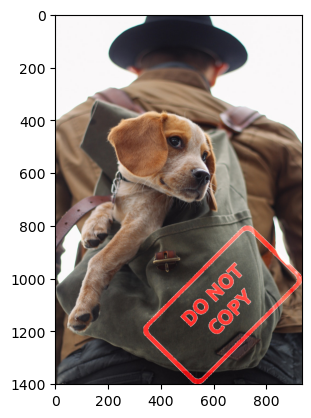

In [311]:
plt.imshow(large_img)

In [314]:
large_img = cv2.cvtColor(large_img, cv2.COLOR_RGB2BGR)
cv2.imwrite('final_image.png', large_img)

True